# 참고: https://wdprogrammer.tistory.com/43
 https://github.com/go1217jo/kaggle_study
 Kaggle Speech representation and data exploration kernel

In [ ]:
# wav 파일 샘플링
from scipy.io import wavfile

train_audio_path = '/content/'
filename = 'output000000000.wav'
sample_rate, samples = wavfile.read(train_audio_path + filename)
print('sample rate : {}, samples.shape : {}'.format(sample_rate, samples.shape))

sample rate : 16000, samples.shape : (481280,)


Visualization
음성은 시간, 주파수, 진폭(amplitude)으로 이루어져 있다. 하지만 단순하게 spectrum 그래프를 그리면 이 세 가지 요소를 동시에 살펴볼 수 없다. 그래서 신호의 spectral content의 시간 변위를 표시하는 시간, 주파수에 대한 2차 함수인 Spectrogram을 계산해야 한다


In [ ]:
# Spectrogram 함수 정의
from scipy import signal
import numpy as np

def log_specgram(audio, sample_rate, window_size=20, step_size=10, eps=1e-10):
    # nperseg: Length of each segment
    # noverlap: Number of points to overlap between segments
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio, fs=sample_rate,
                                            window='hann', nperseg=nperseg,
                                            noverlap=noverlap, detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

Text(0.5, 0, 'Seconds')

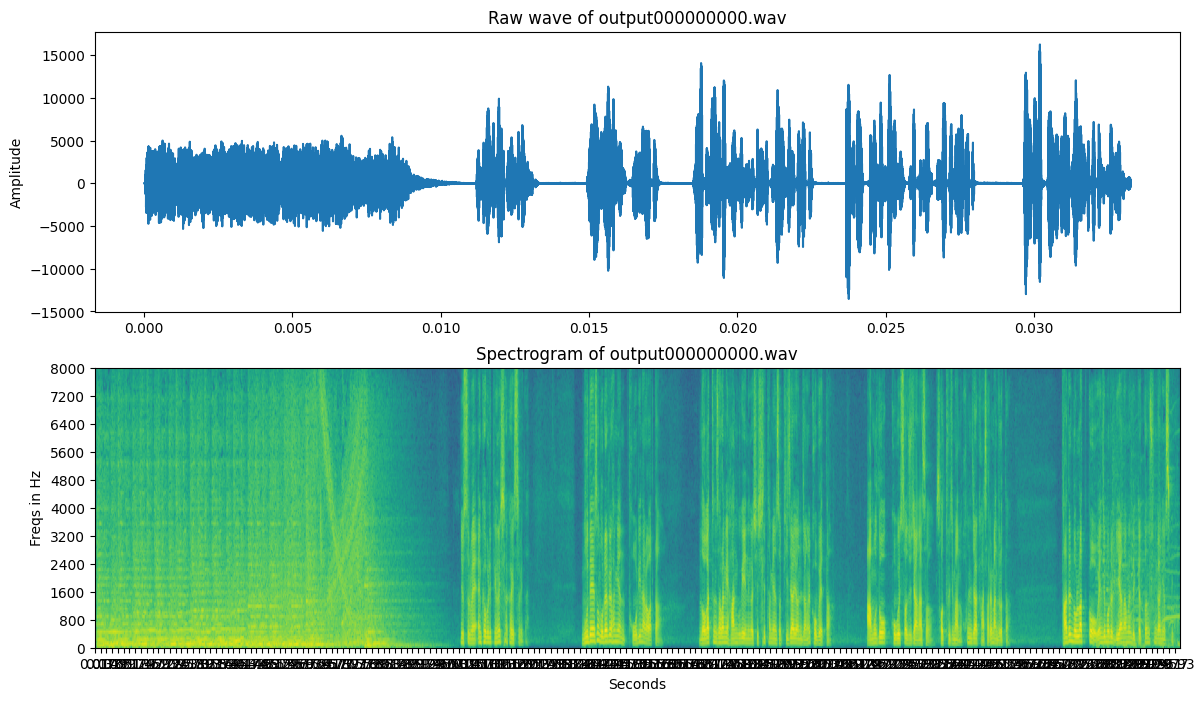

In [ ]:
# Amplitude, Spectrogram plot 그리기
import matplotlib.pyplot as plt

freqs, times, spectrogram = log_specgram(samples, sample_rate)

fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), len(samples)), samples)

ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower',
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of ' + filename)
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

In [ ]:
# 3D로 그리기
from plotly.offline import iplot
import IPython.display as ipd
import plotly.graph_objs as go

data = [go.Surface(x=times, y=freqs, z=spectrogram.T)]
layout = go.Layout(
    autosize=False,
    width=800, height=600,
    title = 'Spectrogram of "yes" in 3D',
    scene = dict(
        yaxis = dict(title='Frequencies', range=[freqs.min(), freqs.max()]),
        xaxis = dict(title='Time', range=[times.min(), times.max()]),
        zaxis = dict(title='Log amplitude')
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# spectrogram값의 범위 확인
print('{} ~ {}'.format(spectrogram.min(), spectrogram.max()))

-23.025850296020508 ~ 12.211116790771484
